In [1]:
!pip install torch torchvision torchaudio
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print("Tensor x:\n", x)

y = x ** 2 + 3
print("Tensor y:\n", y)

Tensor x:
 tensor([[1., 2.],
        [3., 4.]])
Tensor y:
 tensor([[ 4.,  7.],
        [12., 19.]])


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

Usando dispositivo: cpu


In [4]:
X = torch.randn(200, 4)
y = torch.randint(0, 3, (200,))  # 3 clases

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [5]:
class RedSimple(nn.Module):
    def __init__(self):
        super(RedSimple, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = RedSimple().to(device)
print(model)

RedSimple(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=3, bias=True)
)


In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

losses = []
for epoch in range(10):
    total_loss = 0
    for batch_x, batch_y in dataloader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Época {epoch+1}, Pérdida total: {total_loss:.4f}")
    losses.append(total_loss)

Época 1, Pérdida total: 14.9688
Época 2, Pérdida total: 14.3246
Época 3, Pérdida total: 14.0362
Época 4, Pérdida total: 14.0226
Época 5, Pérdida total: 13.9429
Época 6, Pérdida total: 13.8032
Época 7, Pérdida total: 13.7271
Época 8, Pérdida total: 13.7065
Época 9, Pérdida total: 13.6030
Época 10, Pérdida total: 13.5658


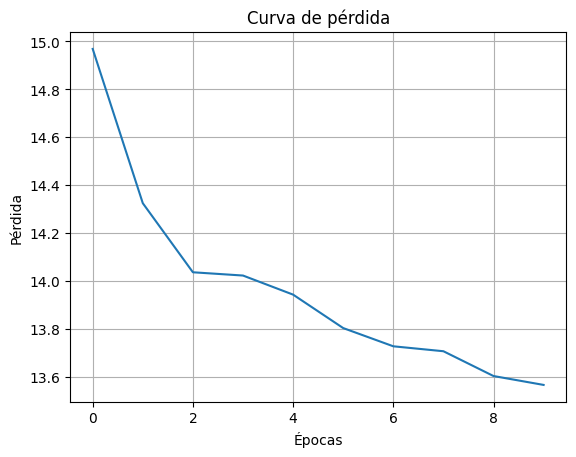

In [7]:
plt.plot(losses)
plt.title("Curva de pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid()
plt.show()

In [8]:
class RedMejorada(nn.Module):
    def __init__(self):
        super(RedMejorada, self).__init__()
        self.fc1 = nn.Linear(4, 32)       # Capa 1
        self.fc2 = nn.Linear(32, 16)      # Nueva capa oculta
        self.fc3 = nn.Linear(16, 3)       # Capa de salida

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = RedMejorada().to(device)
print(model)

RedMejorada(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=3, bias=True)
)


In [10]:
class RedConDropout(nn.Module):
    def __init__(self):
        super(RedConDropout, self).__init__()
        self.fc1 = nn.Linear(4, 32)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(32, 16)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)

model = RedConDropout().to(device)

In [11]:
# Entrenar por más épocas
for epoch in range(30):  # antes eran 10
    ...


In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # antes era 0.01
